In [1]:
import numpy as np
from keras.datasets import mnist
from fc_net import *
from utils import *
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2
%matplotlib inline

np.warnings.filterwarnings('ignore')
np.random.seed(42)

Using TensorFlow backend.


In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print_shapes(X_train, y_train, X_test, y_test)
print("classes = ", list(np.unique(y_train)))

x_train.shape = (60000, 28, 28)
y_train.shape = (60000,)

x_test.shape = (10000, 28, 28)
y_test.shape = (10000,)

classes =  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [3]:
# data preprocessing 
X_train, y_train, X_test, y_test = prepare_data(X_train, y_train, X_test, y_test)
print_shapes(X_train, y_train, X_test, y_test)
X_train, X_test = scale_data(X_train, X_test)

x_train.shape = (60000, 784)
y_train.shape = (60000, 10)

x_test.shape = (10000, 784)
y_test.shape = (10000, 10)



In [4]:
hidden_dims = [20,7,5,10]
lr = 0.009
batch_size = 64
iters = 9000000
min_epochs=10

In [18]:
# batch sizes experiment
batch_experiment_results = {}
for batch_size in [32, 64, 128]:
    batch_experiment_results[batch_size] = L_layer_model(X_train, y_train, 
                            hidden_dims, 
                            learning_rate=lr, 
                            batch_size=batch_size, 
                            use_batchnorm=False, # no batch norm
                            dropout=1, # no dropout
                            num_iterations=iters, 
                            min_epochs=min_epochs)

iteration step: 100 | cost: 2.0474363223796903
iteration step: 200 | cost: 1.9862610658519748
iteration step: 300 | cost: 2.0225808190602654
iteration step: 400 | cost: 1.8315095784789022
iteration step: 500 | cost: 1.800986186392714
iteration step: 600 | cost: 1.399497700501013
iteration step: 700 | cost: 1.5219597880850353
iteration step: 800 | cost: 1.2723273730522957
iteration step: 900 | cost: 1.5423026710372731
iteration step: 1000 | cost: 1.0739604888567191
iteration step: 1100 | cost: 0.9197919336255161
iteration step: 1200 | cost: 1.1074453674218991
iteration step: 1300 | cost: 1.1554015087087506
iteration step: 1400 | cost: 0.8332815936785799
iteration step: 1500 | cost: 0.5761855389860874
iteration step: 1600 | cost: 0.6992145410688938
iteration step: 1700 | cost: 0.5155201513272651
iteration step: 1800 | cost: 0.7002371062691279
iteration step: 1900 | cost: 0.8283096814571349
iteration step: 2000 | cost: 0.6521685240571509
iteration step: 2100 | cost: 0.6516192083328203
ite

iteration step: 2000 | cost: 0.2876554346357038
iteration step: 2100 | cost: 0.4393830586280492
iteration step: 2200 | cost: 0.5041834395231708
iteration step: 2300 | cost: 0.27682253885258357
iteration step: 2400 | cost: 0.5547320549537781
iteration step: 2500 | cost: 0.45174677099211014
iteration step: 2600 | cost: 0.2546124110637034
iteration step: 2700 | cost: 0.34754040432472066
iteration step: 2800 | cost: 0.2734907286052525
iteration step: 2900 | cost: 0.3167779494232931
iteration step: 3000 | cost: 0.3290554302520648
iteration step: 3100 | cost: 0.37338701808178587
iteration step: 3200 | cost: 0.2659447601319355
iteration step: 3300 | cost: 0.3304788407582132
iteration step: 3400 | cost: 0.19504162051465884
iteration step: 3500 | cost: 0.2147145348709732
iteration step: 3600 | cost: 0.331279178822224
iteration step: 3700 | cost: 0.37787902080274993
iteration step: 3800 | cost: 0.19888592635395785
iteration step: 3900 | cost: 0.5363982567948079
iteration step: 4000 | cost: 0.372

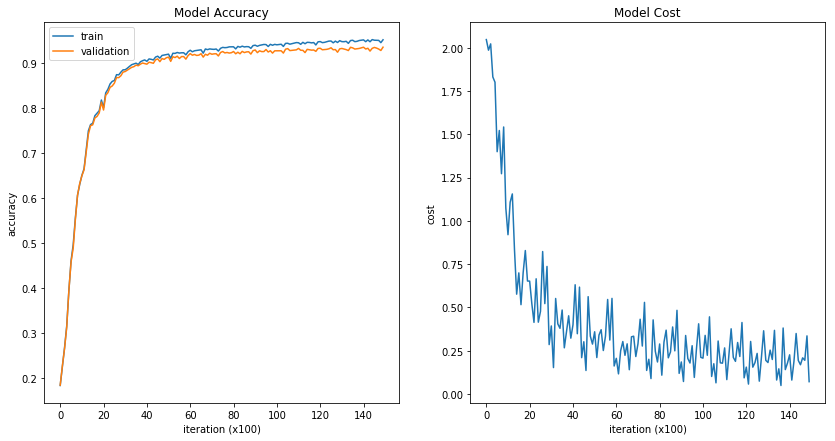

In [19]:
draw_results(batch_experiment_results[32][3], batch_experiment_results[32][2],  batch_experiment_results[32][1])

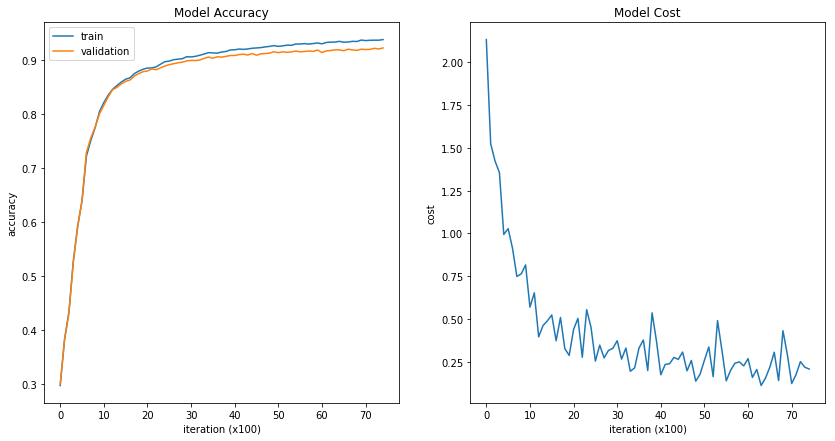

In [20]:
draw_results(batch_experiment_results[64][3], batch_experiment_results[64][2],  batch_experiment_results[64][1])

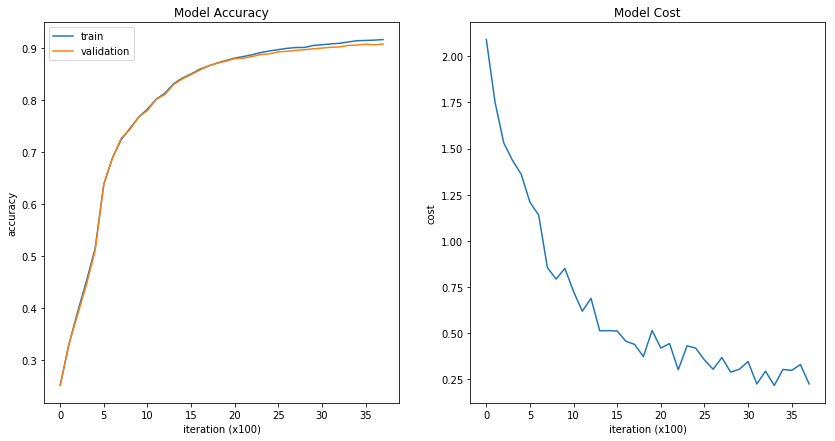

In [21]:
draw_results(batch_experiment_results[128][3], batch_experiment_results[128][2],  batch_experiment_results[128][1])

In [11]:
min_epochs=5
batch_size = 64


In [12]:
### Experiments
def no_bn_no_do():
    results = L_layer_model(X_train, y_train, 
                            hidden_dims, 
                            learning_rate=lr, 
                            batch_size=batch_size, 
                            use_batchnorm=False, # no batch norm
                            dropout=1, # no dropout
                            num_iterations=iters, 
                            min_epochs=min_epochs)
    
    params, costs, accs, train_accs, train_last_acc, val_last_acc = results
    test_acc = predict(X_test, y_test, params, use_batchnorm=False) # predict on test
    return costs, accs, train_accs, train_last_acc, test_acc, val_last_acc


def yes_bn_no_do():
    results = L_layer_model(X_train, y_train, 
                            hidden_dims, 
                            learning_rate=lr, 
                            batch_size=batch_size, 
                            use_batchnorm=True, # yes batch norm
                            dropout=1, # no dropout
                            num_iterations=iters, 
                            min_epochs=min_epochs)
    
    params, costs, accs, train_accs, train_last_acc, val_last_acc = results
    test_acc = predict(X_test, y_test, params, use_batchnorm=True) # predict on test
    return costs, accs, train_accs, train_last_acc, test_acc, val_last_acc
    
    
def no_bn_yes_do():
    p=0.7
    results = L_layer_model(X_train, y_train, 
                            hidden_dims, 
                            learning_rate=lr, 
                            batch_size=batch_size, 
                            use_batchnorm=False, # no batch norm
                            dropout=p, # yes dropout
                            num_iterations=iters, 
                            min_epochs=min_epochs)
    
    params, costs, accs, train_accs, train_last_acc, val_last_acc = results
    test_acc = predict(X_test, y_test, params, use_batchnorm=False) # predict on test
    return costs, accs, train_accs, train_last_acc, test_acc, val_last_acc


In [13]:
def evaluate(experiment):
    costs, accs, train_accs, train_last_acc, test_acc, val_last_acc = experiment()
    
    draw_results(train_accs, accs, costs)
    
    print()
    print('Train accuracy: {}\nValidation accuracy: {}\nTest accuracy: {}\n'.format(train_last_acc, val_last_acc, test_acc))

def draw_results(train_accs, val_accs, costs):   
    fig, axes = plt.subplots(1, 2)
    fig.set_figheight(7)
    fig.set_figwidth(14)

    # plot accuracy 
    axes[0].plot(train_accs)
    axes[0].plot(val_accs)
    axes[0].set_title('Model Accuracy')
    axes[0].set_ylabel('accuracy')
    axes[0].set_xlabel('iteration (x100)')
    axes[0].legend(['train', 'validation'], loc='best')

    # plot loss
    axes[1].plot(costs)
    axes[1].set_title('Model Cost')
    axes[1].set_ylabel('cost')
    axes[1].set_xlabel('iteration (x100)')
    

iteration step: 100 | cost: 2.018703271686271
iteration step: 200 | cost: 1.6260139942213263
iteration step: 300 | cost: 1.441745370516337
iteration step: 400 | cost: 1.162141825832631
iteration step: 500 | cost: 1.058085566259053
iteration step: 600 | cost: 1.0583880179360743
iteration step: 700 | cost: 0.8968108880593588
iteration step: 800 | cost: 1.0471134507024182
iteration step: 900 | cost: 0.9879213363735386
iteration step: 1000 | cost: 0.9005160304430625
iteration step: 1100 | cost: 0.9235821069981384
iteration step: 1200 | cost: 0.7227446360585265
iteration step: 1300 | cost: 0.6726536854904761
iteration step: 1400 | cost: 0.7178466650704567
iteration step: 1500 | cost: 0.5559413296050375
iteration step: 1600 | cost: 0.6467193361426278
iteration step: 1700 | cost: 0.5577192884402329
iteration step: 1800 | cost: 0.7439884269250053
iteration step: 1900 | cost: 0.42439925642160764
iteration step: 2000 | cost: 0.4343798692534484
iteration step: 2100 | cost: 0.567346902550824
itera

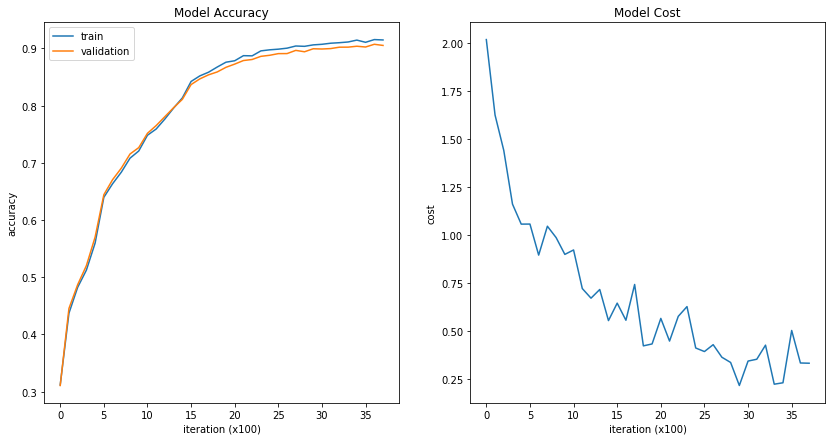

In [14]:
%%time
evaluate(no_bn_no_do)

iteration step: 100 | cost: 2.0893468374156177
iteration step: 200 | cost: 2.0932548583089785
iteration step: 300 | cost: 1.9822704581775867
iteration step: 400 | cost: 1.790816350644601
iteration step: 500 | cost: 1.79813494731092
iteration step: 600 | cost: 1.6943390498070918
iteration step: 700 | cost: 1.662209436430742
iteration step: 800 | cost: 1.6261997856312382
iteration step: 900 | cost: 1.5756457603866947
iteration step: 1000 | cost: 1.4856444999442802
iteration step: 1100 | cost: 1.5056860409221757
iteration step: 1200 | cost: 1.4521790779228683
iteration step: 1300 | cost: 1.2594443324688376
iteration step: 1400 | cost: 1.2853459893560144
iteration step: 1500 | cost: 1.3305719813215169
iteration step: 1600 | cost: 1.1611430318640923
iteration step: 1700 | cost: 1.2221070766652782
iteration step: 1800 | cost: 1.137563894161301
iteration step: 1900 | cost: 1.0638560523521043
iteration step: 2000 | cost: 1.0962954745520868
iteration step: 2100 | cost: 1.0156608469929382
iterat

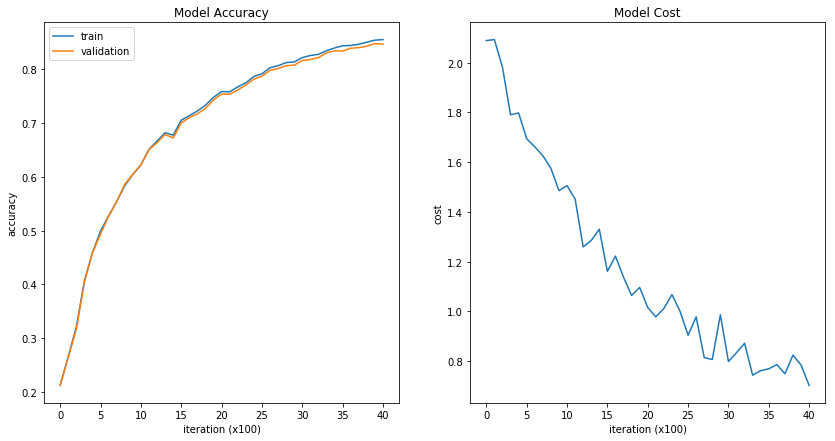

In [15]:
%%time
evaluate(yes_bn_no_do)

iteration step: 100 | cost: 2.3112585881799883
iteration step: 200 | cost: 2.2567028730429066
iteration step: 300 | cost: 2.3337906178541346
iteration step: 400 | cost: 2.201734430631339
iteration step: 500 | cost: 2.153325414430944
iteration step: 600 | cost: 2.1649894847220037
iteration step: 700 | cost: 2.2478776227089887
iteration step: 800 | cost: 2.4459528407368376
iteration step: 900 | cost: 2.20147692694696
iteration step: 1000 | cost: 2.152866297175386
iteration step: 1100 | cost: 2.1086253986059624
iteration step: 1200 | cost: 2.1084590228036655
iteration step: 1300 | cost: 2.0533626686161233
iteration step: 1400 | cost: 2.165660428157424
iteration step: 1500 | cost: 2.0665696620896803
iteration step: 1600 | cost: 2.018880359431532
iteration step: 1700 | cost: 1.9485877964671374
iteration step: 1800 | cost: 1.9603785949445072
iteration step: 1900 | cost: 1.978107625148955
iteration step: 2000 | cost: 1.8695117865250435
iteration step: 2100 | cost: 2.2647079723168435
iteration

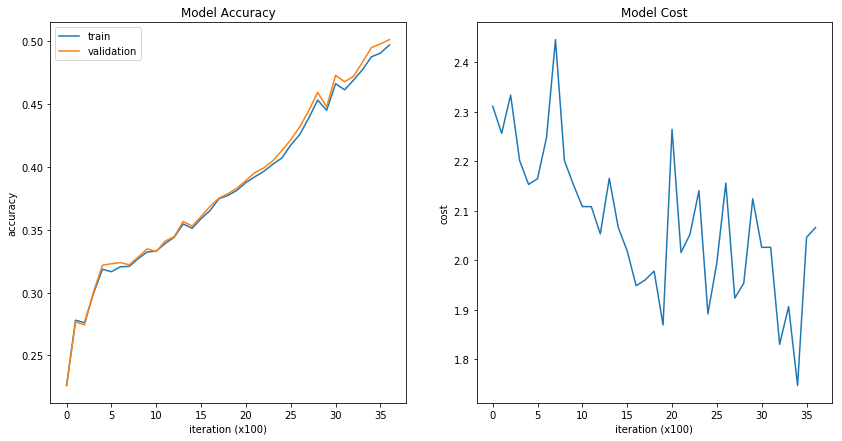

In [16]:
%%time
evaluate(no_bn_yes_do)

In [17]:
min_epochs=8

iteration step: 100 | cost: 1.8822517618714727
iteration step: 200 | cost: 1.7698246498699945
iteration step: 300 | cost: 1.7872570345821188
iteration step: 400 | cost: 1.683975004898755
iteration step: 500 | cost: 1.582975855253291
iteration step: 600 | cost: 1.6337468584684811
iteration step: 700 | cost: 1.5483588743455183
iteration step: 800 | cost: 1.318036526624624
iteration step: 900 | cost: 1.5003572351645935
iteration step: 1000 | cost: 1.2450492551973067
iteration step: 1100 | cost: 1.413722412591461
iteration step: 1200 | cost: 1.161384715472098
iteration step: 1300 | cost: 1.1052378002779748
iteration step: 1400 | cost: 1.2045742653307603
iteration step: 1500 | cost: 1.4839763555543848
iteration step: 1600 | cost: 1.0647514608976323
iteration step: 1700 | cost: 0.990027017705805
iteration step: 1800 | cost: 0.9790875855090584
iteration step: 1900 | cost: 1.0304999010790523
iteration step: 2000 | cost: 0.7815692831174417
iteration step: 2100 | cost: 0.9377333596919214
iterati

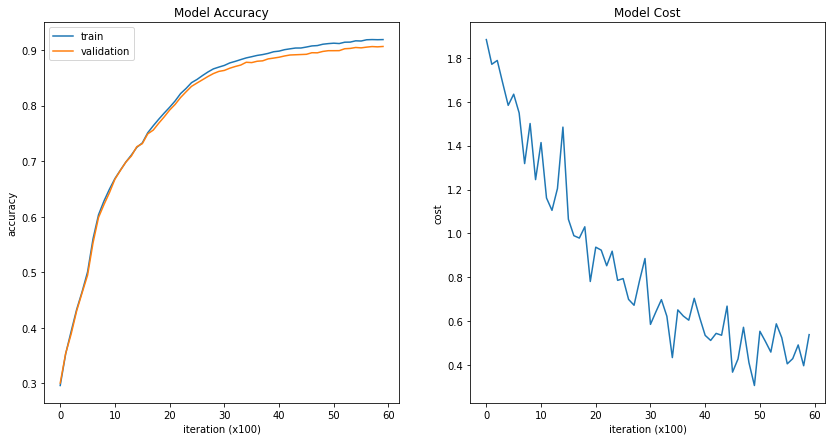

In [18]:
%%time
evaluate(yes_bn_no_do)

iteration step: 100 | cost: 2.237044595429902
iteration step: 200 | cost: 2.30508286157588
iteration step: 300 | cost: 2.285418390959811
iteration step: 400 | cost: 2.2446212945522674
iteration step: 500 | cost: 2.214761361655306
iteration step: 600 | cost: 2.0940303223331838
iteration step: 700 | cost: 2.1914585943248004
iteration step: 800 | cost: 2.1834410580006707
iteration step: 900 | cost: 2.19982211680459
iteration step: 1000 | cost: 2.181995262247903
iteration step: 1100 | cost: 2.152202551508353
iteration step: 1200 | cost: 2.0050594087194975
iteration step: 1300 | cost: 2.027820392334525
iteration step: 1400 | cost: 2.11464872820033
iteration step: 1500 | cost: 2.0310923556680587
iteration step: 1600 | cost: 2.1607952545919606
iteration step: 1700 | cost: 2.0712032551314326
iteration step: 1800 | cost: 2.0182633075632603
iteration step: 1900 | cost: 1.911425252498963
iteration step: 2000 | cost: 1.9325251455484722
iteration step: 2100 | cost: 1.9206238738080623
iteration step

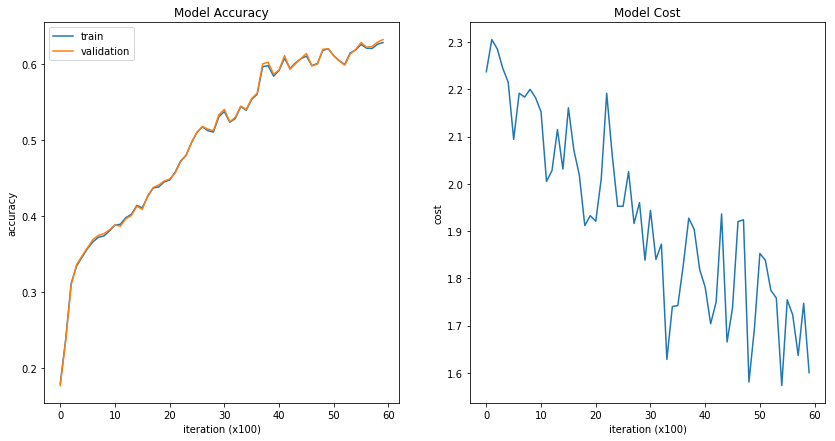

In [19]:
%%time
evaluate(no_bn_yes_do)